In [20]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display all columns of a dataframe
pd.set_option('display.max_columns',71)

#importing stats from scipy
from scipy import stats

In [21]:
#Loading dataset 
data=pd.read_excel(r'C:\Users\Csp\Downloads\Customer_retention_dataset--1-\Customer_retention_dataset\customer_retention_dataset.xlsx')

#display top of dataset
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [22]:
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [23]:
#Renaming entire attribute of data frame by assigning the “columns” attribute a list of new column headings.
data.columns = ['gender','age','city','pincode','duration','shopng_last_1yr','internet_mode','device',
                'device_screen_size','device_OS','browser','channel_1','channel_2','explore_time',
               'payment_method','abandon_freq','abandon_reason','content_readability','product_comparison',
                'info_necessity','info_details','ease_of_navigation','processing_speed','UFI_website',
                'convinient_payment_methods','trust','empathy','customer_privacy','com_channel_availability',
                'discounts&monetarybenefit','enjoyment','convinient&flexible','return&replacemnt','loyalty_program',
                'DisplayQualityInfo','UserSatisfaction','NetBenefit_UserSatisfaction',
                'UserSatisfactionCannotExistWithoutTrust',
               'varieties','Provision_Complete/relevant_info','MonetarySavings','PatronizingRetailer','SenseOfAdventure',
               'SocialStatus','GratificationShopping','ShoppingFulfillRoles','GettingValueForSpentMoney',
               'OnlineRetailers','EasyToUseWebsite','VisualAppealing','WildVarietyOfProductOnOffer',
                'ProductInfo','WebsiteSpeed','WebsiteReliability','websiteQuickness',
                'WebsitePaymentMethods','WebsiteDeliverySpeed', 'WebsiteCustomerInfoPrivacy',
                'WebsiteFinancialInfoSecurity','PerceivedTrustworthiness','WebsiteOnlineAssistance',
                'WebsiteLongerLoginTime','WebsiteLongerDisplayTime','websiteLatePriceDeclaration',
                'WebsiteLongerPageLoading','WebisteLimitedPaymentMode',
               'WebsiteLongerDeliveryTime','WebsiteDesignChange','WebsiteDisruption',
                'WebsiteEfficientAsBefore','WebsiteRecommendation']

In [24]:
data.head()

gender          age           city  pincode       duration  \
0    Male  31-40 years          Delhi   110009  Above 4 years   
1  Female  21-30 years          Delhi   110030  Above 4 years   
2  Female  21-30 years  Greater Noida   201308      3-4 years   
3    Male  21-30 years        Karnal    132001      3-4 years   
4  Female  21-30 years     Bangalore    530068      2-3 years   

      shopng_last_1yr    internet_mode      device device_screen_size  \
0         31-40 times          Dial-up     Desktop             Others   
1  41 times and above            Wi-Fi  Smartphone         4.7 inches   
2  41 times and above  Mobile Internet  Smartphone         5.5 inches   
3  Less than 10 times  Mobile Internet  Smartphone         5.5 inches   
4         11-20 times            Wi-Fi  Smartphone         4.7 inches   

               device_OS        browser          channel_1        channel_2  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

        explore_time                      payment_method     abandon_freq  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)        Sometimes   
1  more than 15 mins                  Credit/Debit cards  Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)        Sometimes   
3          6-10 mins                  Credit/Debit cards            Never   
4  more than 15 mins                  Credit/Debit cards       Frequently   

              abandon_reason content_readability  product_comparison  \
0              Lack of trust           Agree (4)     Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)  Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)           Agree (4)   
3   Better alternative offer           Agree (4)           Agree (4)   
4   Better alternative offer  Strongly agree (5)     Indifferent (3)   

       info_necessity        info_details  ease_of_navigation  \
0     Indifferent (3)           Agree (4)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2           Agree (4)           Agree (4)           Agree (4)   
3     Indifferent (3)           Agree (4)  Strongly agree (5)   
4     Indifferent (3)           Agree (4)           Agree (4)   

        processing_speed         UFI_website convinient_payment_methods  \
0  Strongly disagree (1)       Dis-agree (2)              Dis-agree (2)   
1     Strongly agree (5)  Strongly agree (5)         Strongly agree (5)   
2              Agree (4)  Strongly agree (5)         Strongly agree (5)   
3              Agree (4)  Strongly agree (5)         Strongly agree (5)   
4     Strongly agree (5)  Strongly agree (5)         Strongly agree (5)   

                trust             empathy    customer_privacy  \
0        Disagree (2)  Strongly agree (5)           Agree (4)   
1  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
3           Agree (4)  Strongly agree (5)  Strongly agree (5)   
4           Agree (4)  Strongly agree (5)           Agree (4)   

  com_channel_availability discounts&monetarybenefit              enjoyment  \
0                Agree (4)           indifferent (3)  Strongly disagree (1)   
1       Strongly agree (5)        Strongly agree (5)     Strongly agree (5)   
2       Strongly agree (5)        Strongly agree (5)     Strongly agree (5)   
3                Agree (4)                 Agree (4)        indifferent (3)   
4       Strongly agree (5)        Strongly agree (5)     Strongly agree (5)   

  convinient&flexible   return&replacemnt     loyalty_program  \
0       Dis-agree (2)       D

In [25]:
#dataframe with changed column names
data.columns

Index(['gender', 'age', 'city', 'pincode', 'duration', 'shopng_last_1yr',
       'internet_mode', 'device', 'device_screen_size', 'device_OS', 'browser',
       'channel_1', 'channel_2', 'explore_time', 'payment_method',
       'abandon_freq', 'abandon_reason', 'content_readability',
       'product_comparison', 'info_necessity', 'info_details',
       'ease_of_navigation', 'processing_speed', 'UFI_website',
       'convinient_payment_methods', 'trust', 'empathy', 'customer_privacy',
       'com_channel_availability', 'discounts&monetarybenefit', 'enjoyment',
       'convinient&flexible', 'return&replacemnt', 'loyalty_program',
       'DisplayQualityInfo', 'UserSatisfaction', 'NetBenefit_UserSatisfaction',
       'UserSatisfactionCannotExistWithoutTrust', 'varieties',
       'Provision_Complete/relevant_info', 'MonetarySavings',
       'PatronizingRetailer', 'SenseOfAdventure', 'SocialStatus',
       'GratificationShopping', 'ShoppingFulfillRoles',
       'GettingValueForSpentMoney', '

In [26]:
print('Customer retention Dataset has ', data.shape[0], 'rows and ', data.shape[1], 'columns\n')

Customer retention Dataset has  269 rows and  71 columns



In [27]:
pd.set_option('display.max_rows',71)
print('\nData Types of data set attributes---->')
data.dtypes


Data Types of data set attributes---->


gender                                     object
age                                        object
city                                       object
pincode                                     int64
duration                                   object
shopng_last_1yr                            object
internet_mode                              object
device                                     object
device_screen_size                         object
device_OS                                  object
browser                                    object
channel_1                                  object
channel_2                                  object
explore_time                               object
payment_method                             object
abandon_freq                               object
abandon_reason                             object
content_readability                        object
product_comparison                         object
info_necessity                             object


In [28]:
#Checking for null values in the dataset
data.isnull().sum()

gender                                     0
age                                        0
city                                       0
pincode                                    0
duration                                   0
shopng_last_1yr                            0
internet_mode                              0
device                                     0
device_screen_size                         0
device_OS                                  0
browser                                    0
channel_1                                  0
channel_2                                  0
explore_time                               0
payment_method                             0
abandon_freq                               0
abandon_reason                             0
content_readability                        0
product_comparison                         0
info_necessity                             0
info_details                               0
ease_of_navigation                         0
processing

In [29]:
#Checking for duplicate entries in the dataset
data.duplicated().sum()

166

In [30]:
#Dropping duplicated rows
data.drop_duplicates(keep='first',inplace=True)

In [31]:
print('Shape of dataset after removing duplicates---->')
print('Data has ', data.shape[0], 'rows and ', data.shape[1], 'columns\n')

Shape of dataset after removing duplicates---->
Data has  103 rows and  71 columns



In [32]:
## Checking for unique values of each attributes:

print('No. of Unique values in each attribute------')
data.apply(lambda x: len(x.unique()))

No. of Unique values in each attribute------


gender                                      2
age                                         5
city                                       11
pincode                                    39
duration                                    5
shopng_last_1yr                             6
internet_mode                               4
device                                      4
device_screen_size                          4
device_OS                                   3
browser                                     4
channel_1                                   3
channel_2                                   5
explore_time                                5
payment_method                              3
abandon_freq                                4
abandon_reason                              5
content_readability                         4
product_comparison                          4
info_necessity                              5
info_details                                4
ease_of_navigation                

In [33]:
for attribute in data:
    print('-----------',attribute,'---------')
    print(data[attribute].value_counts(),end='\n')
    print('\n')

----------- gender ---------
Female    66
Male      37
Name: gender, dtype: int64


----------- age ---------
21-30 years           32
31-40 years           30
41-50 yaers           29
51 years and above     6
Less than 20 years     6
Name: age, dtype: int64


----------- city ---------
Delhi            22
Greater Noida    17
Noida            17
Bangalore        17
Karnal           11
Merrut            5
Ghaziabad         5
Solan             4
Gurgaon           3
Moradabad         1
Bulandshahr       1
Name: city, dtype: int64


----------- pincode ---------
201308    13
132001     7
110044     7
201310     6
250001     5
560037     4
132036     4
110008     3
201312     3
201306     3
201305     3
110011     3
560010     3
173229     2
560018     2
530068     2
122018     2
201005     2
110042     2
110014     2
110018     2
173212     2
201303     2
201304     2
560003     2
560002     2
560013     1
122009     1
244001     1
110009     1
201001     1
201008     1
201009     1
203207

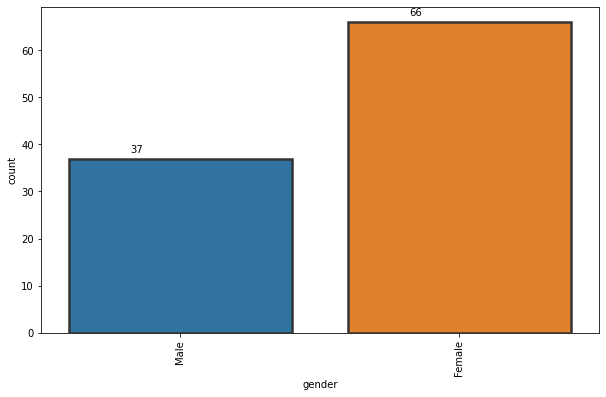

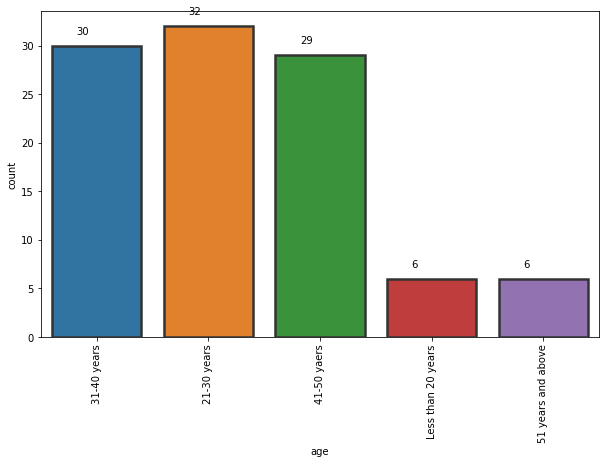

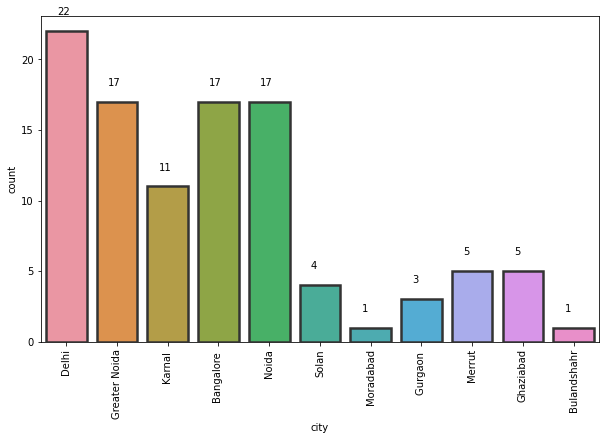

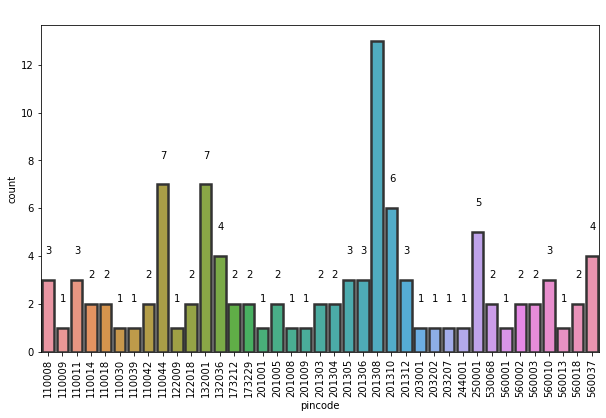

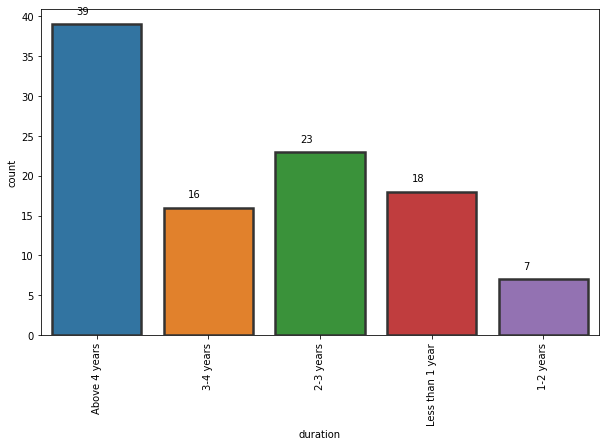

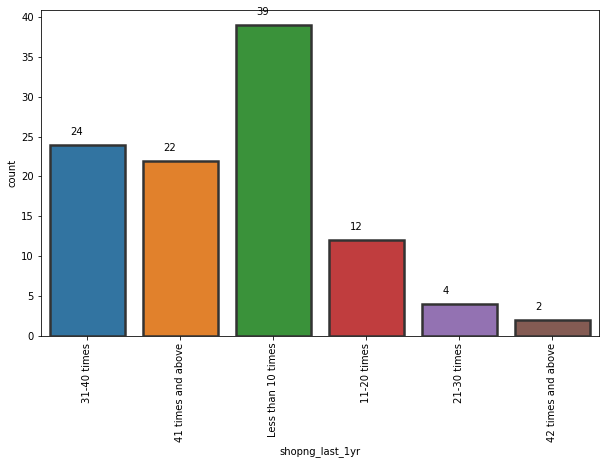

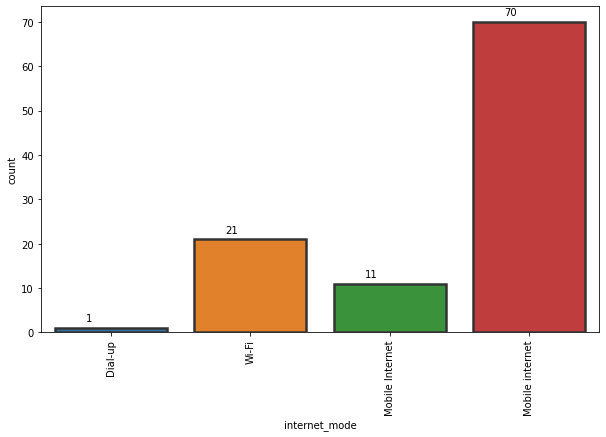

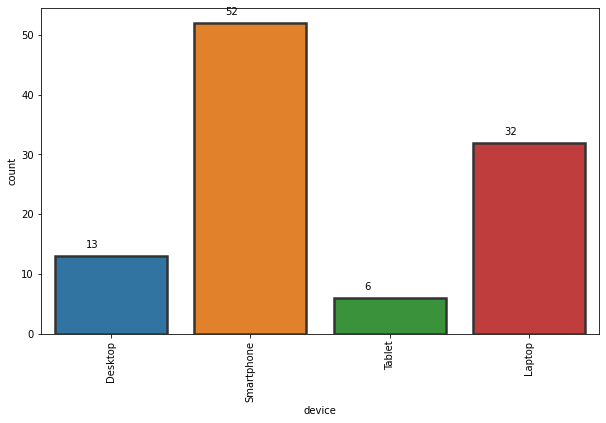

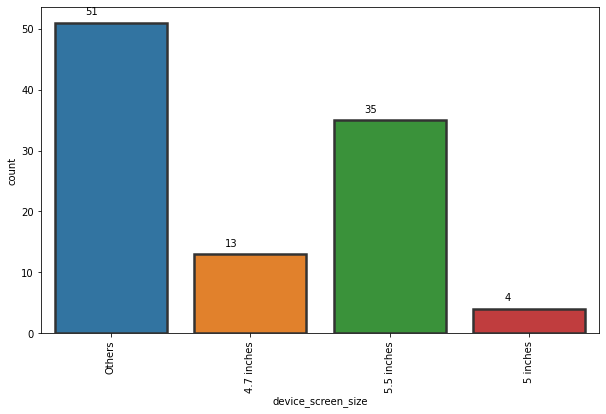

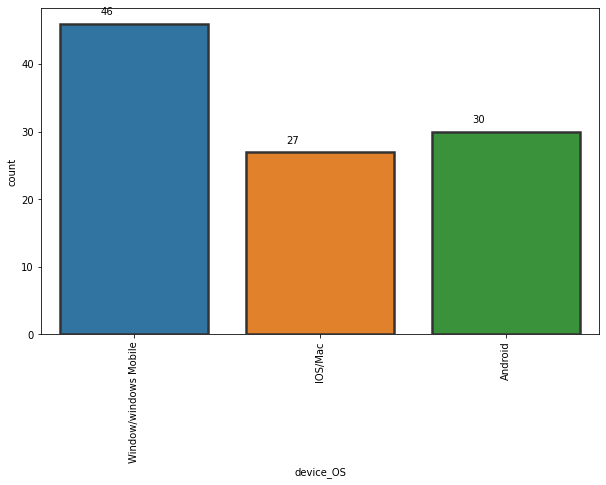

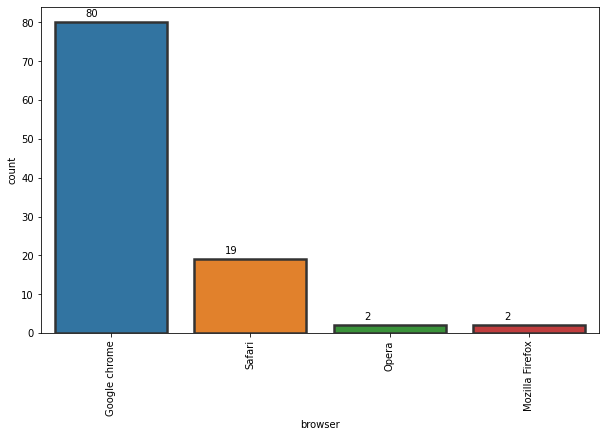

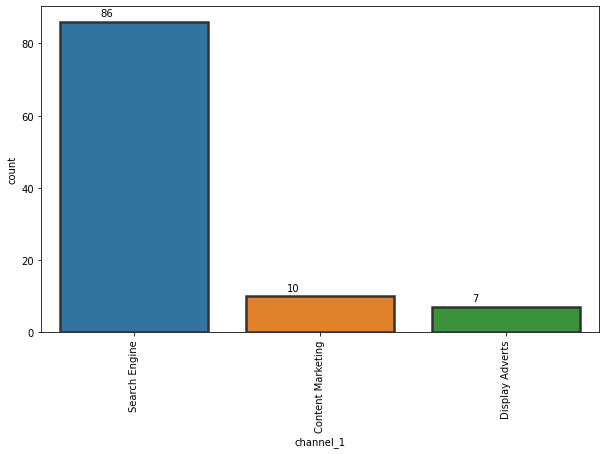

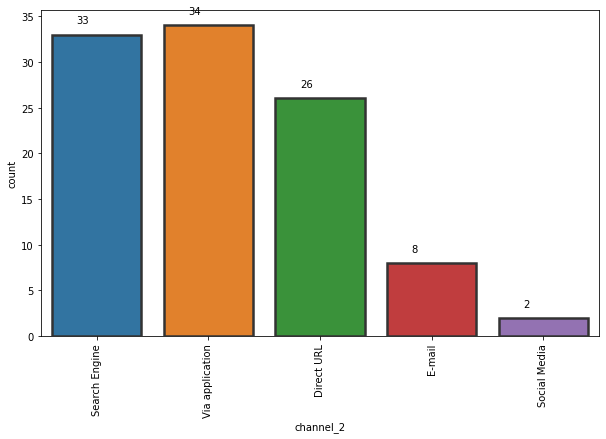

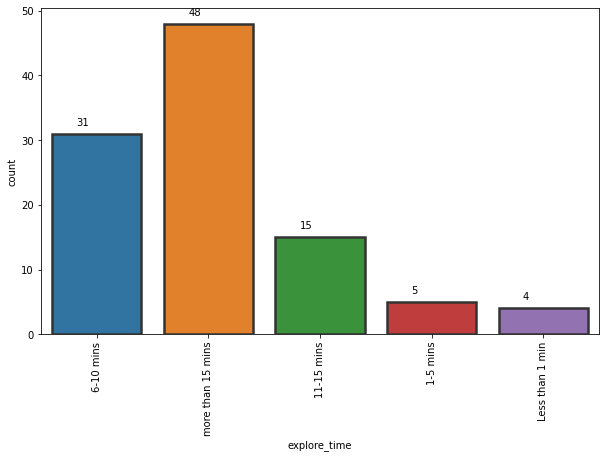

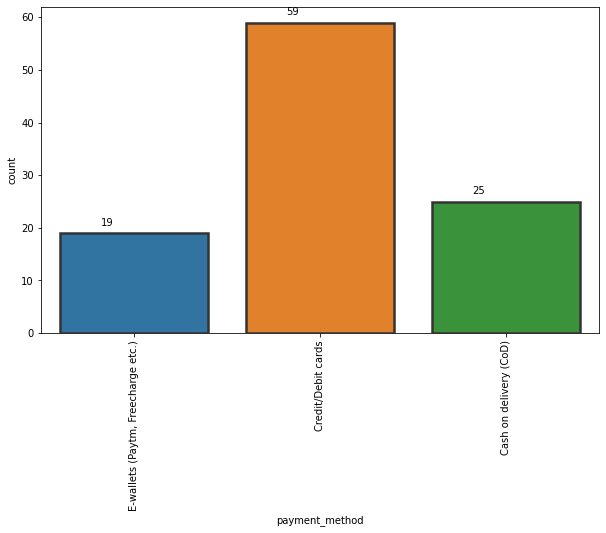

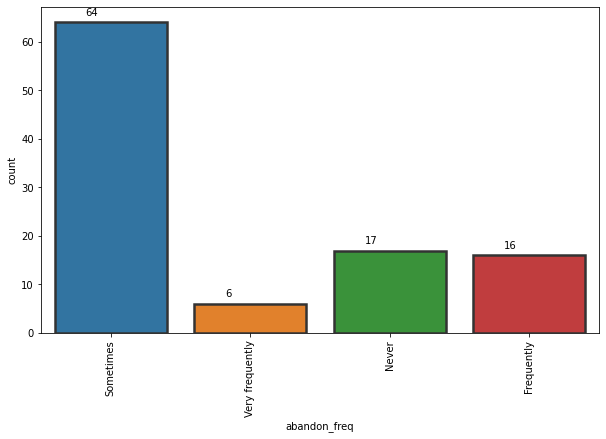

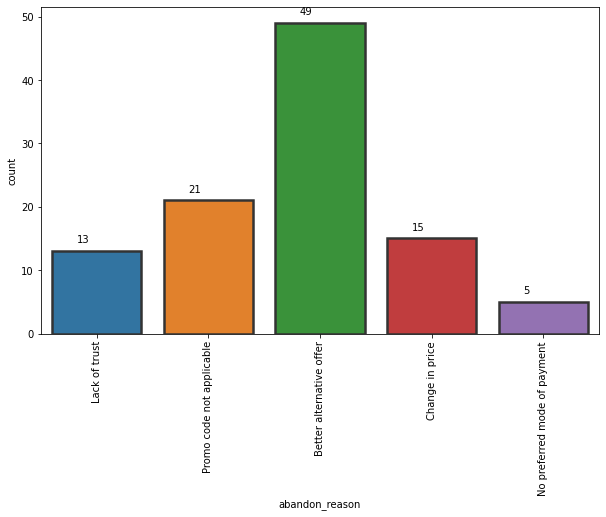

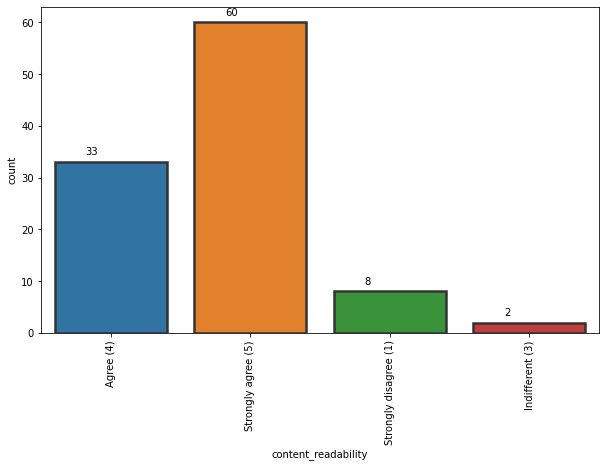

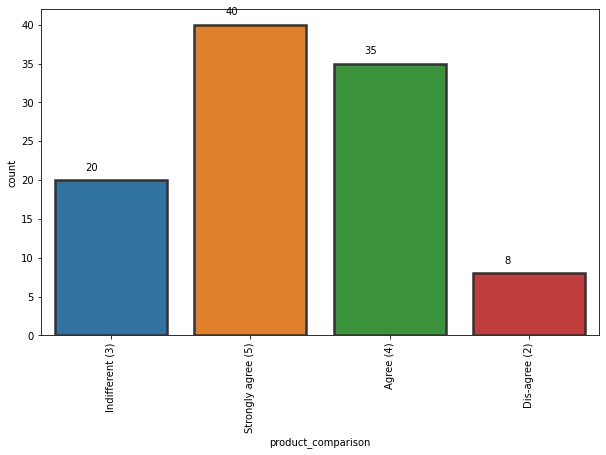

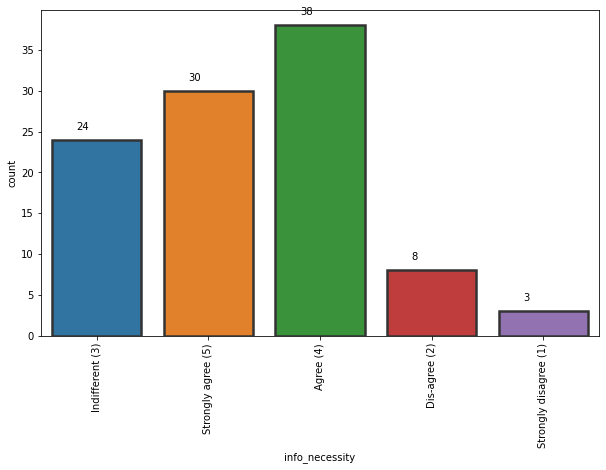

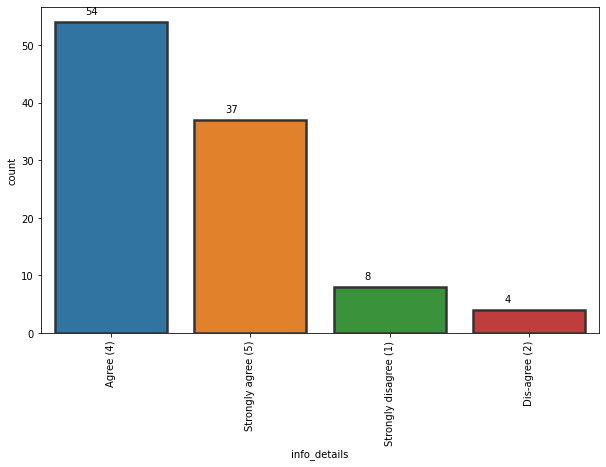

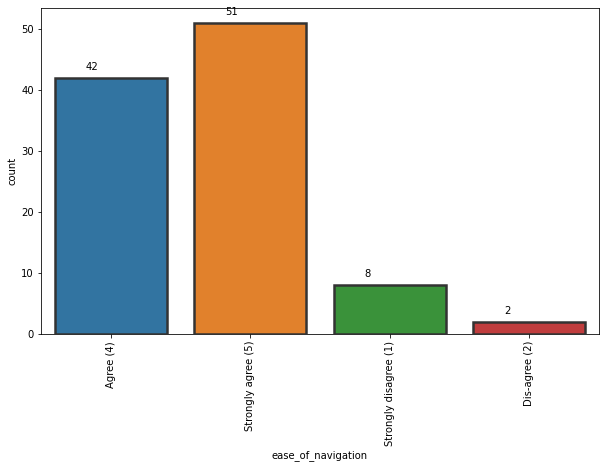

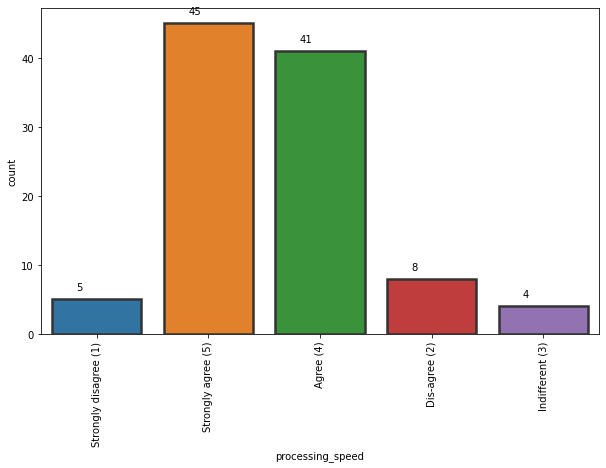

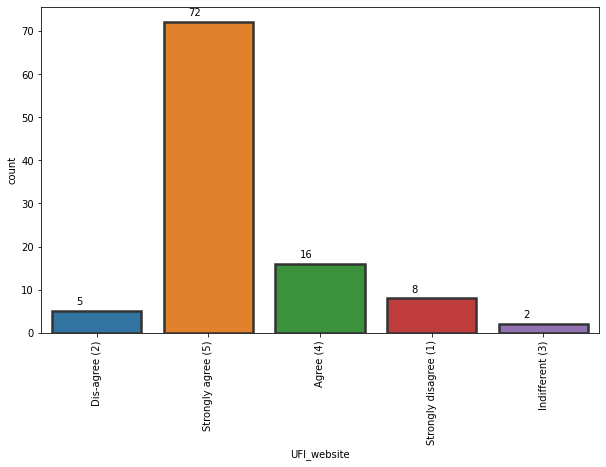

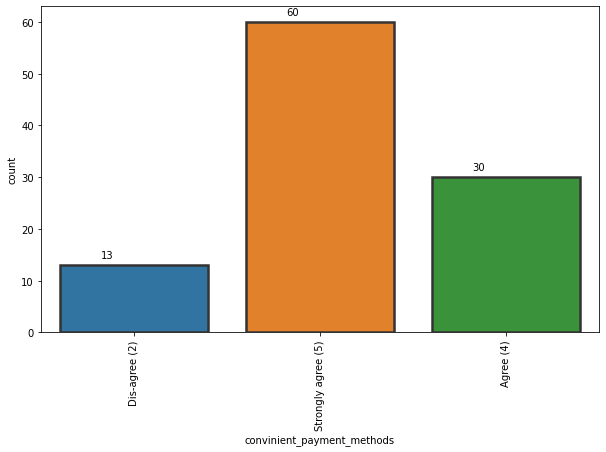

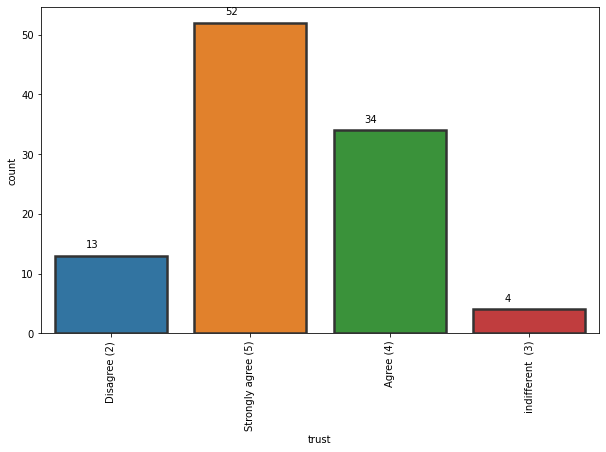

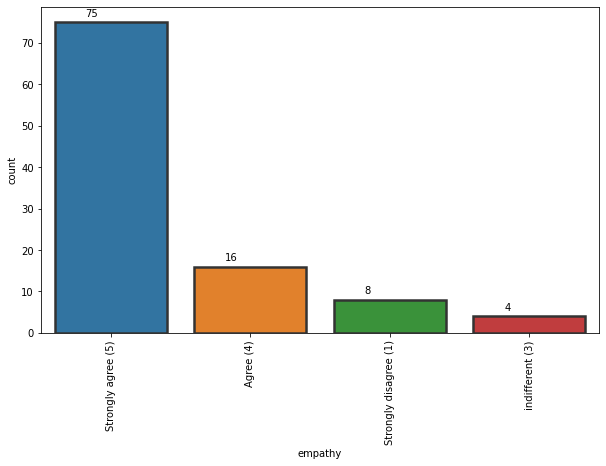

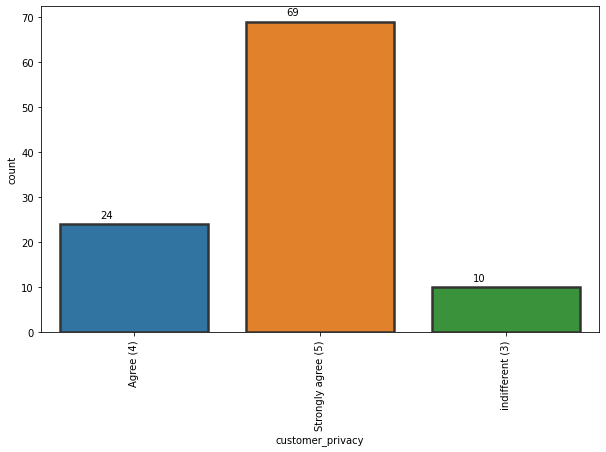

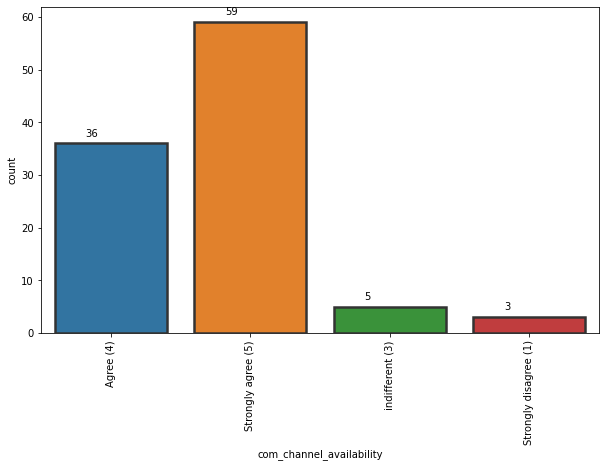

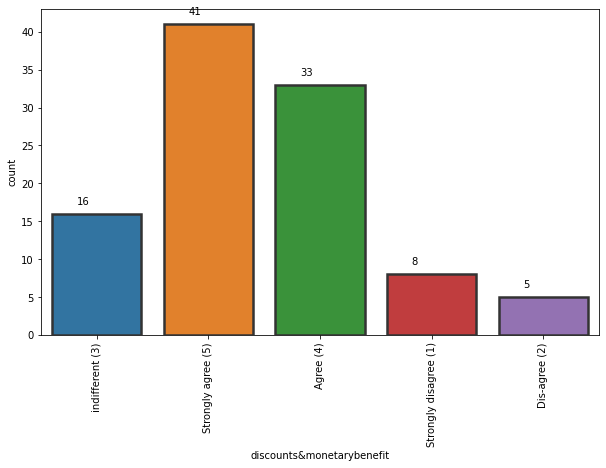

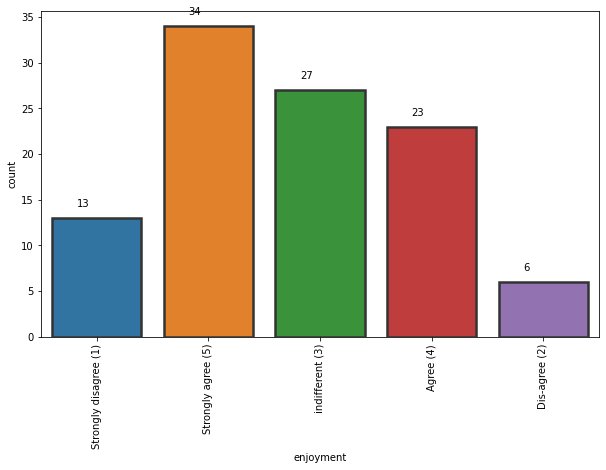

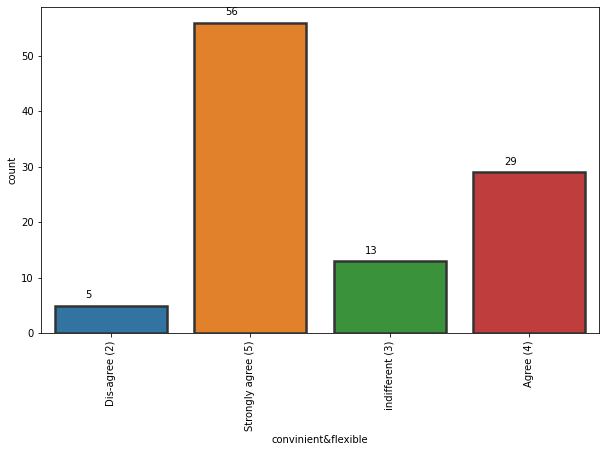

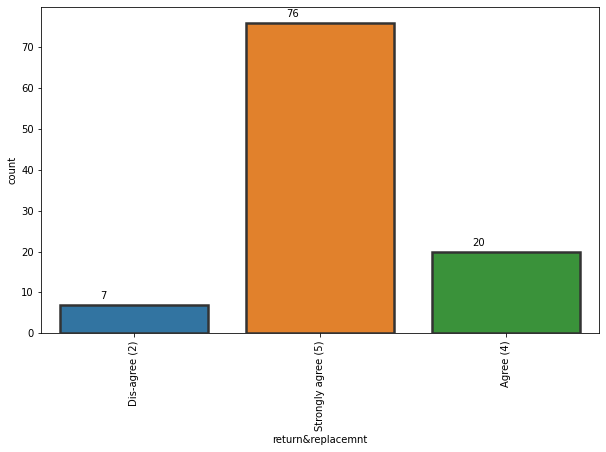

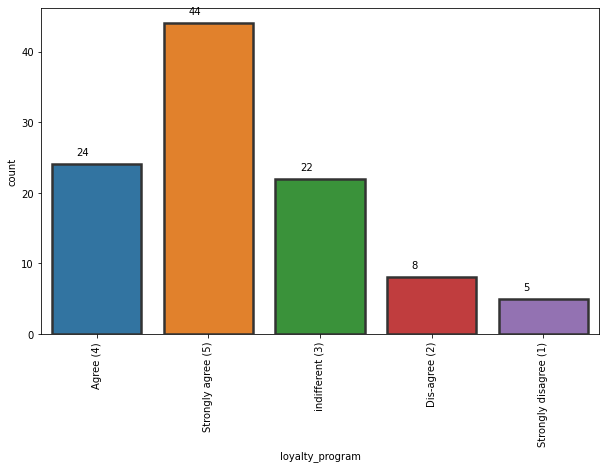

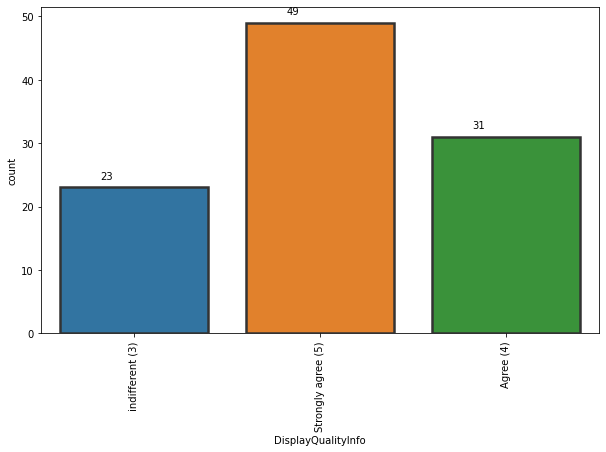

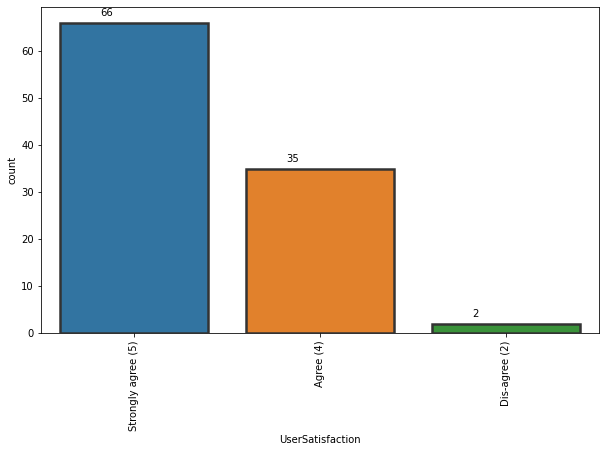

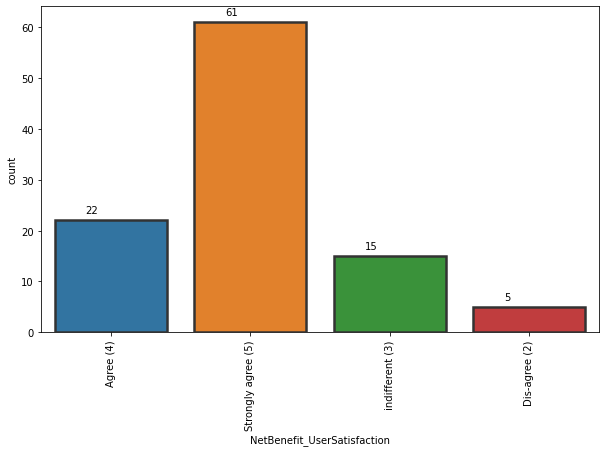

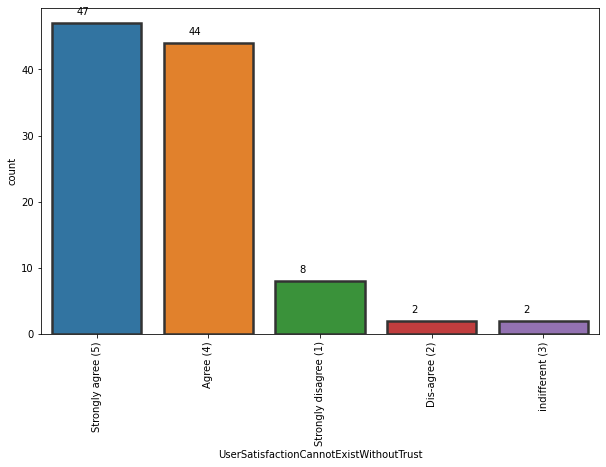

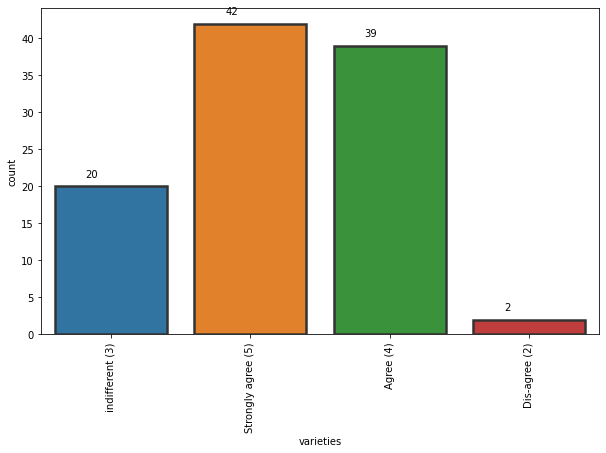

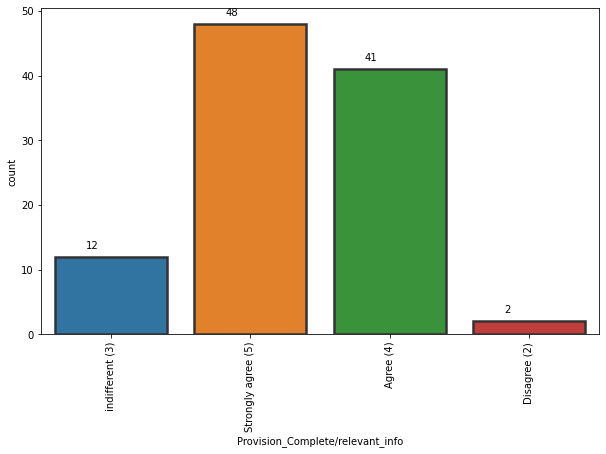

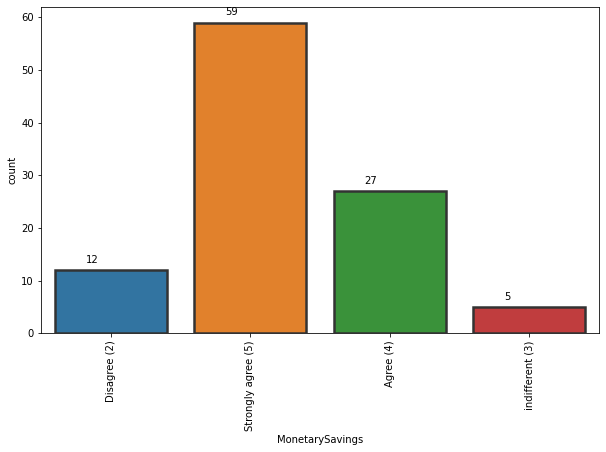

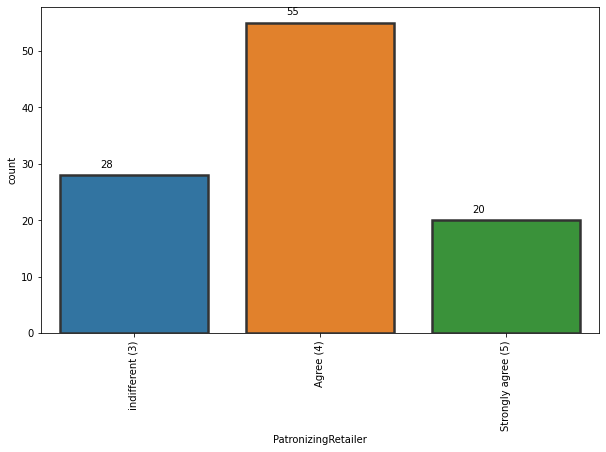

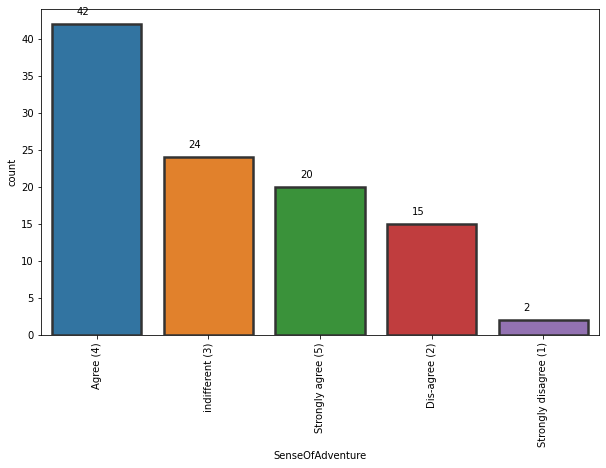

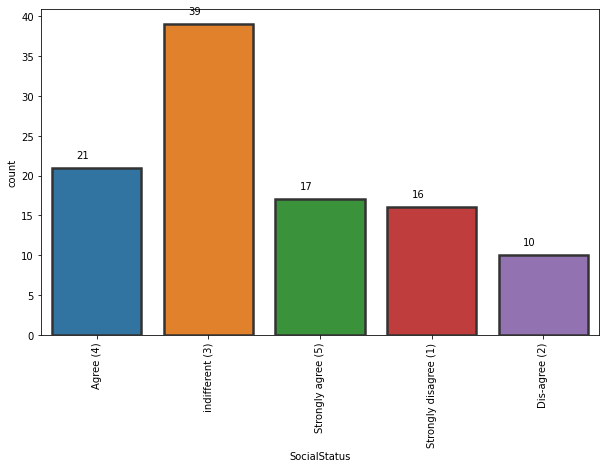

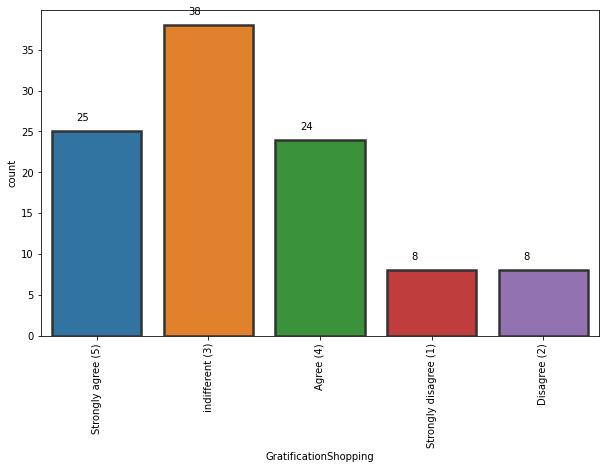

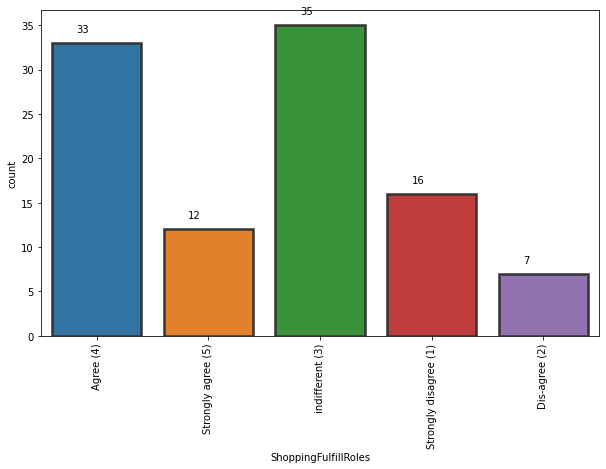

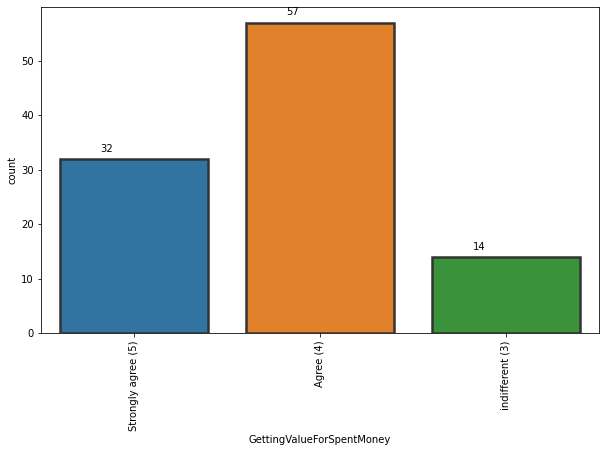

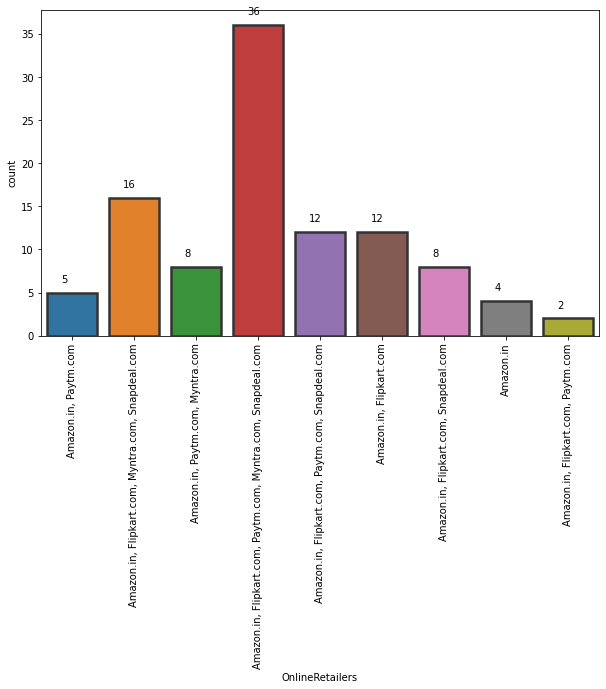

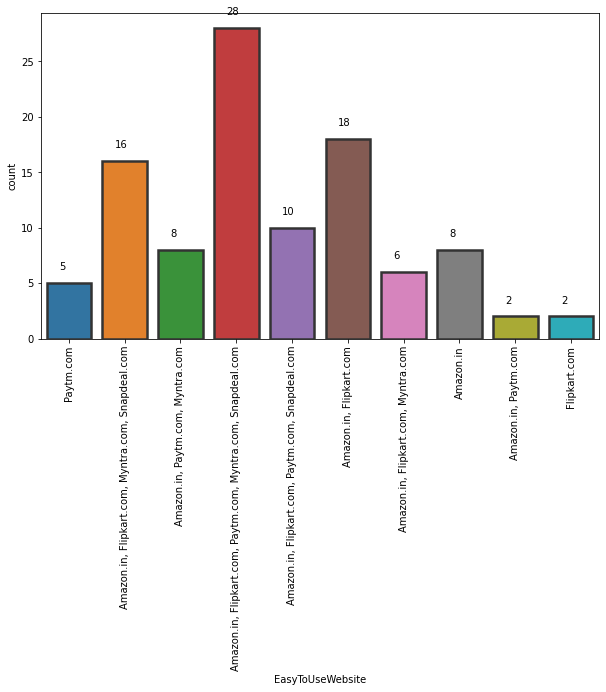

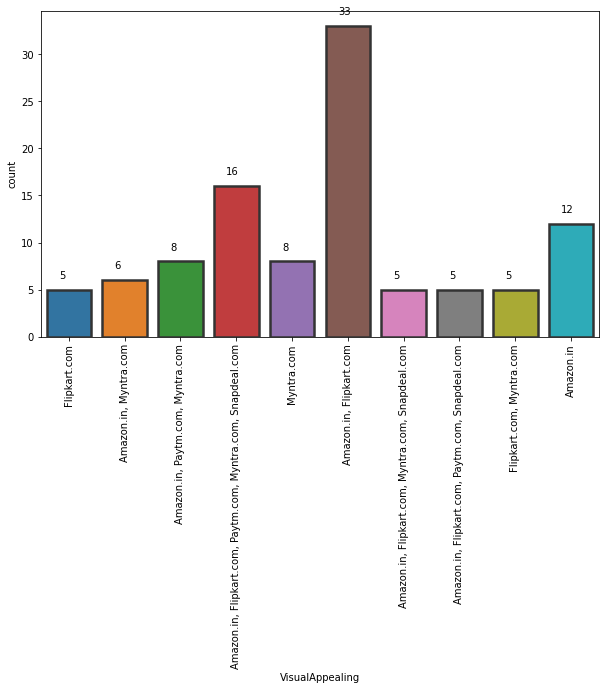

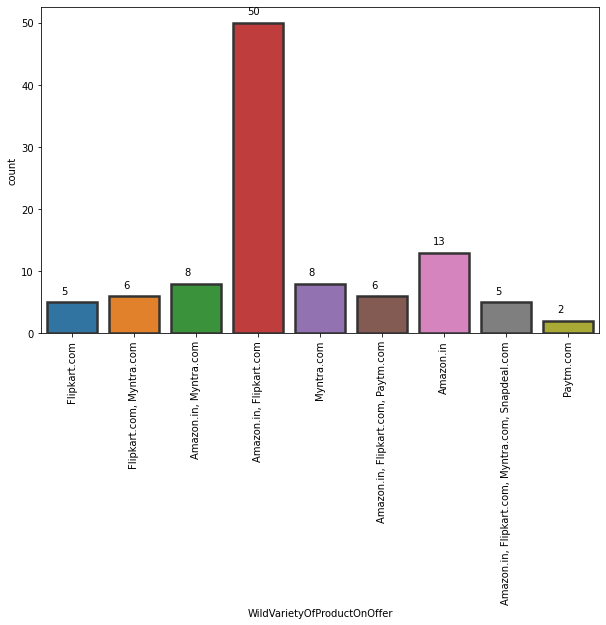

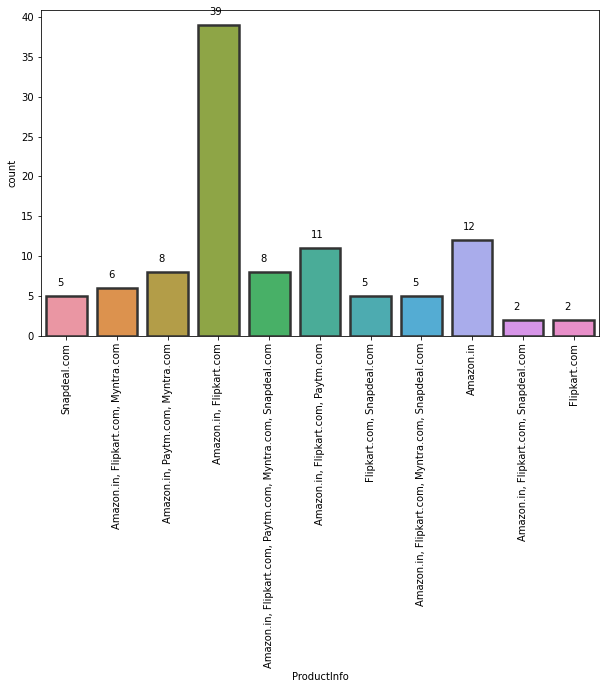

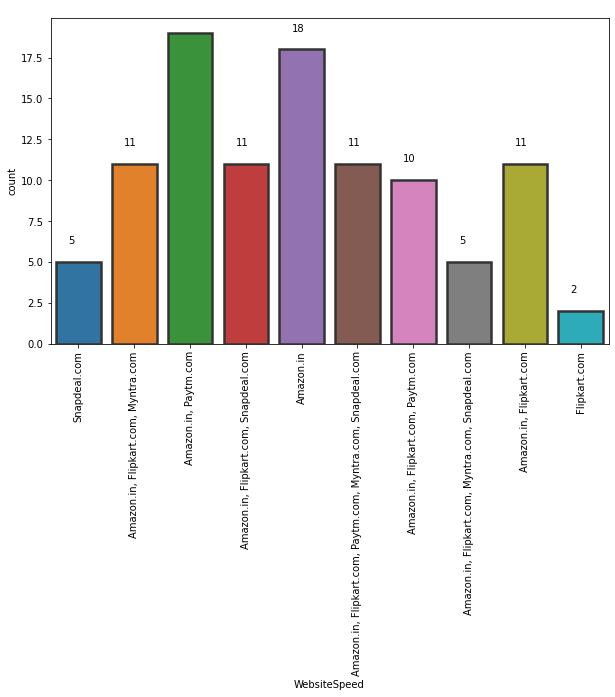

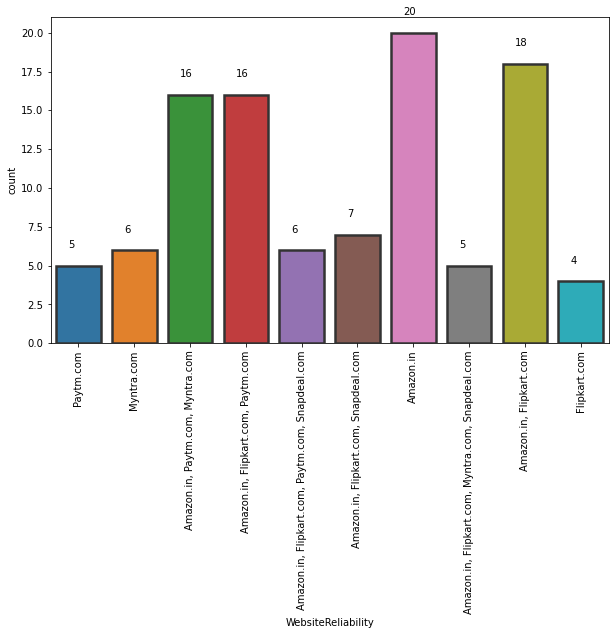

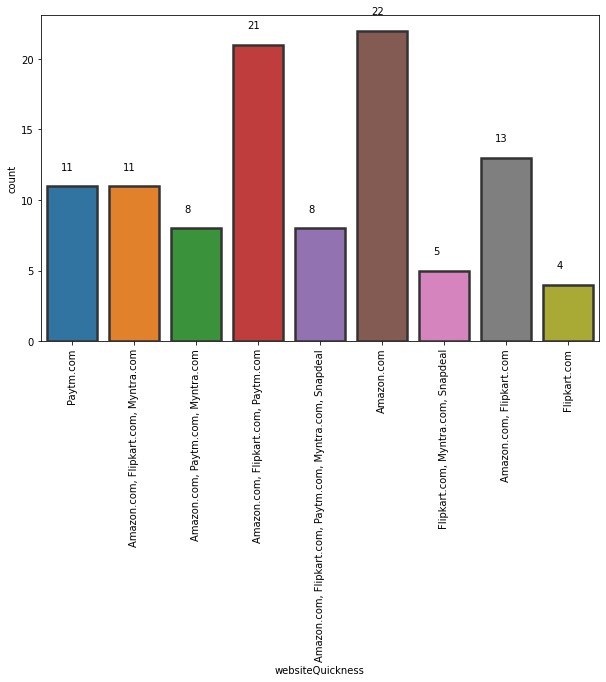

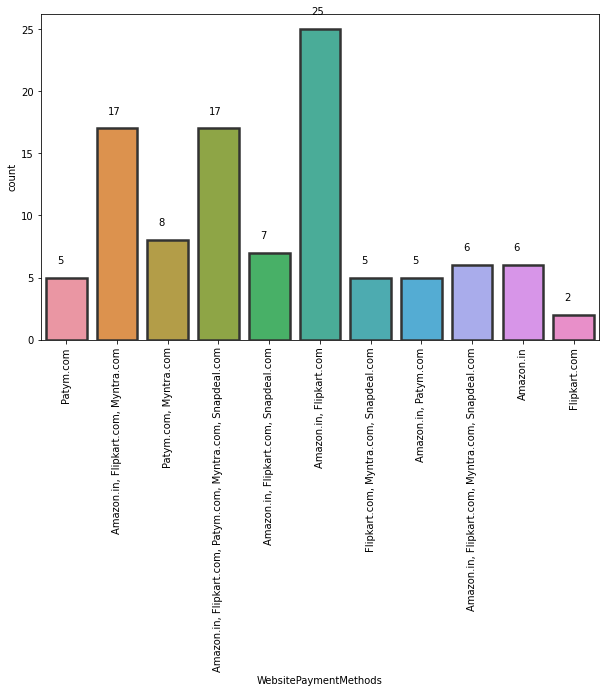

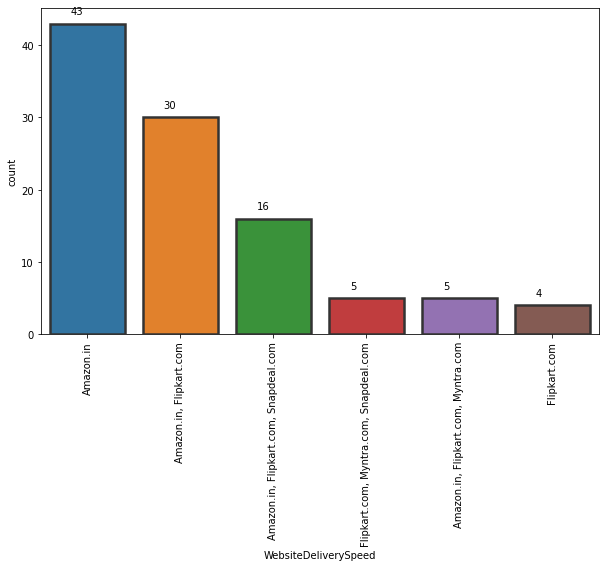

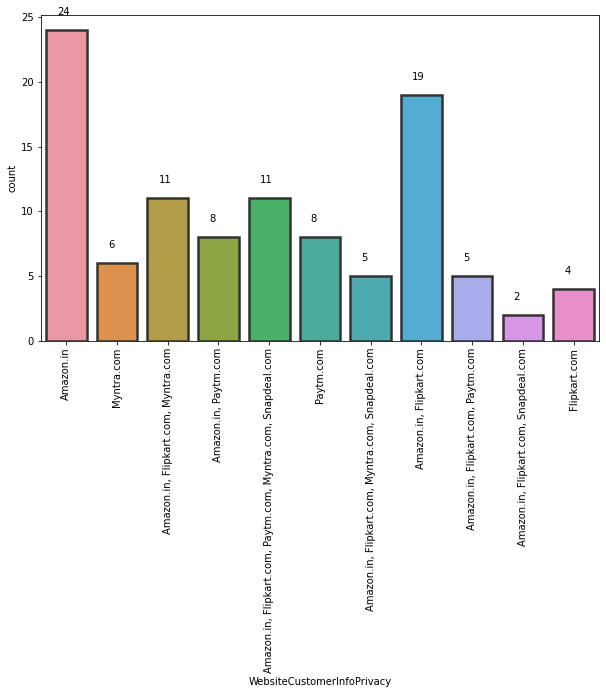

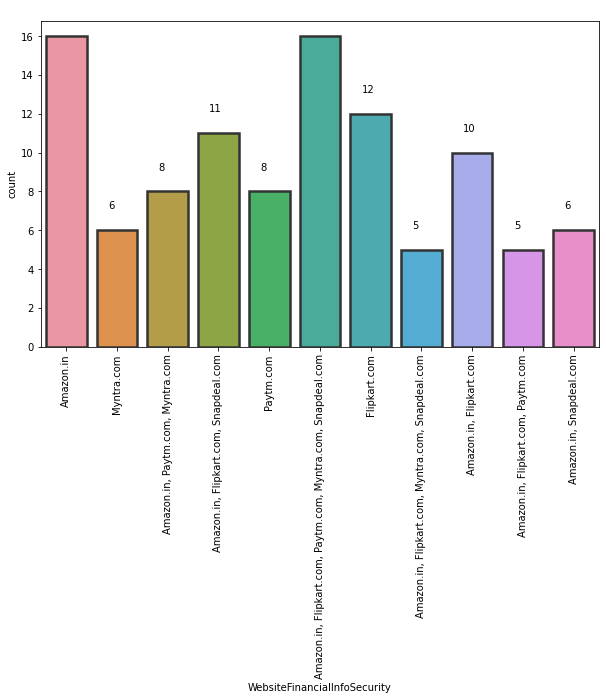

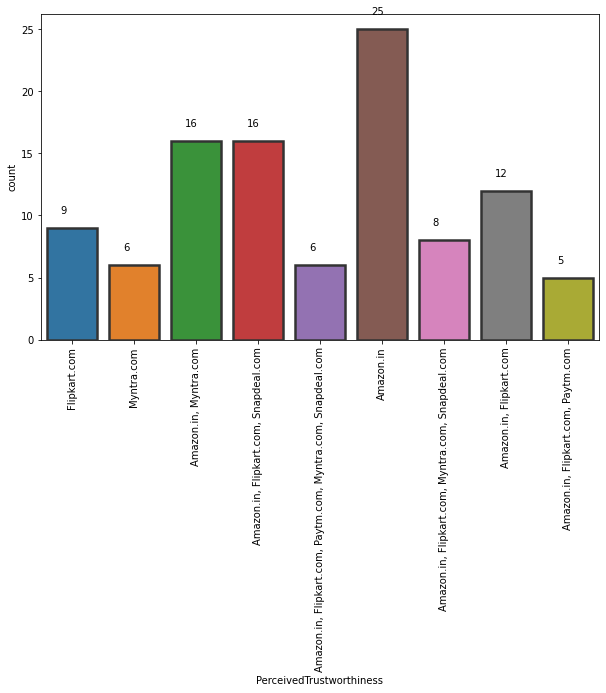

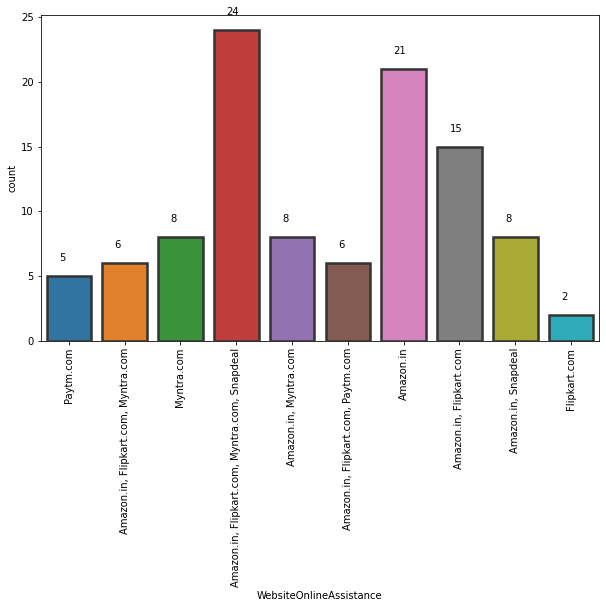

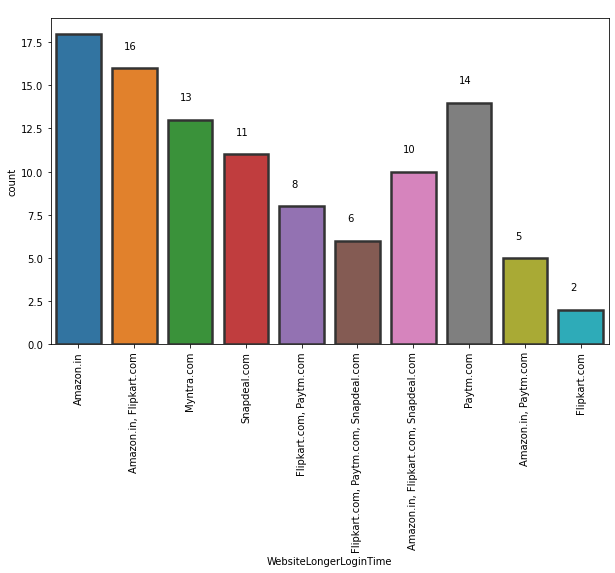

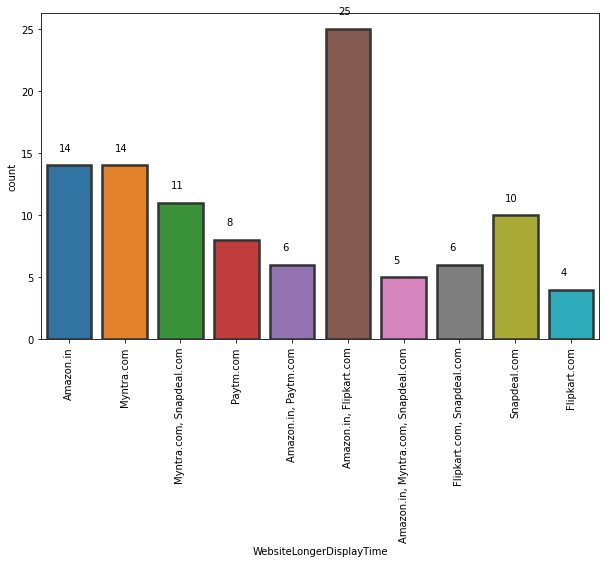

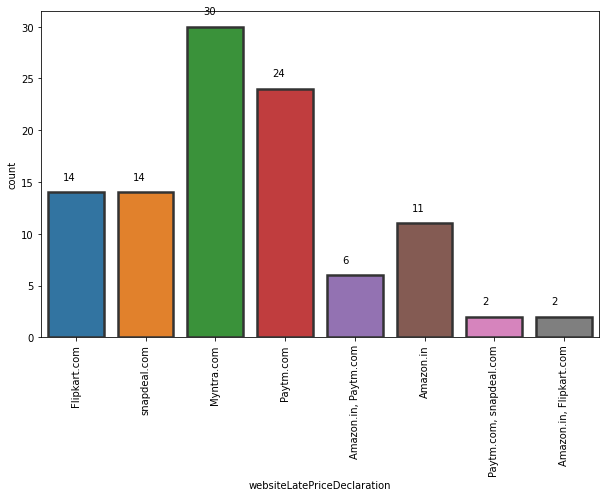

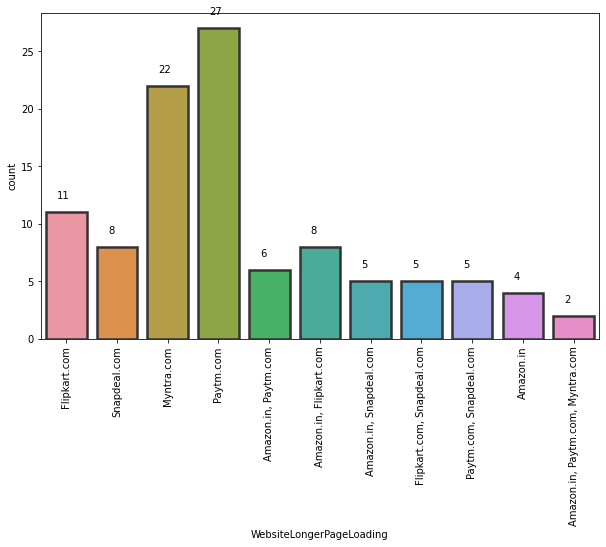

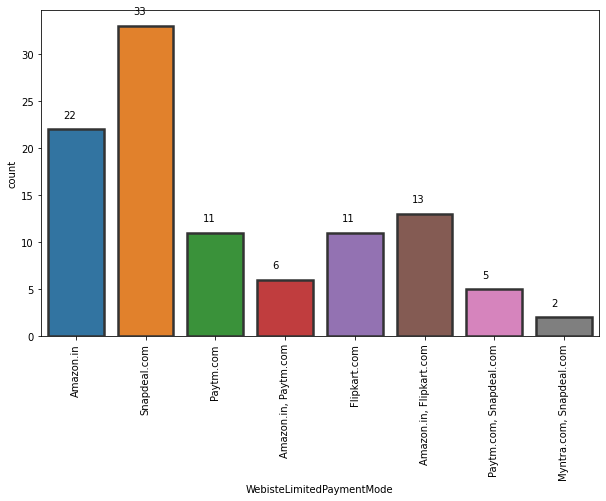

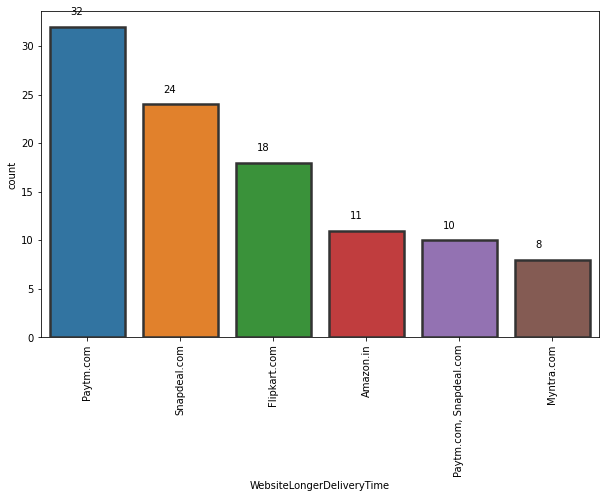

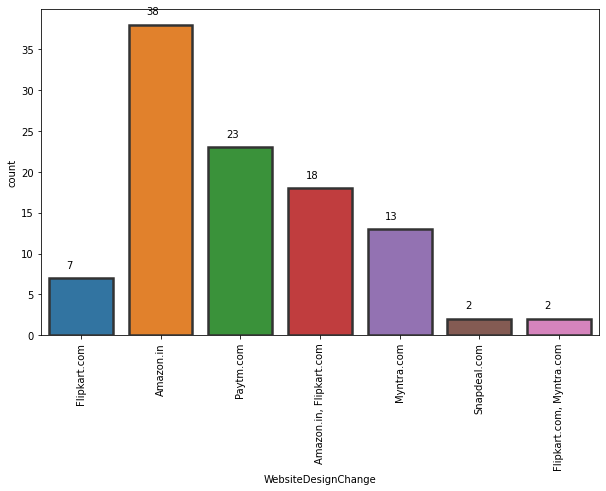

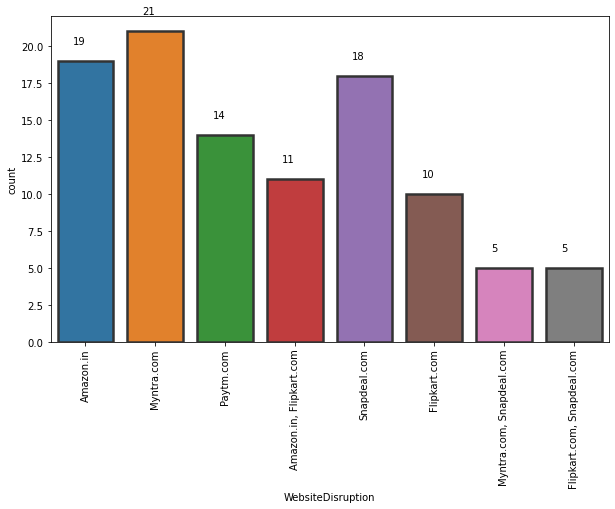

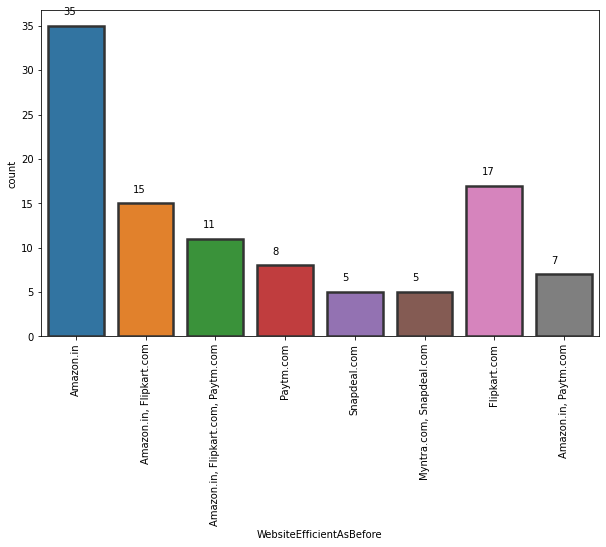

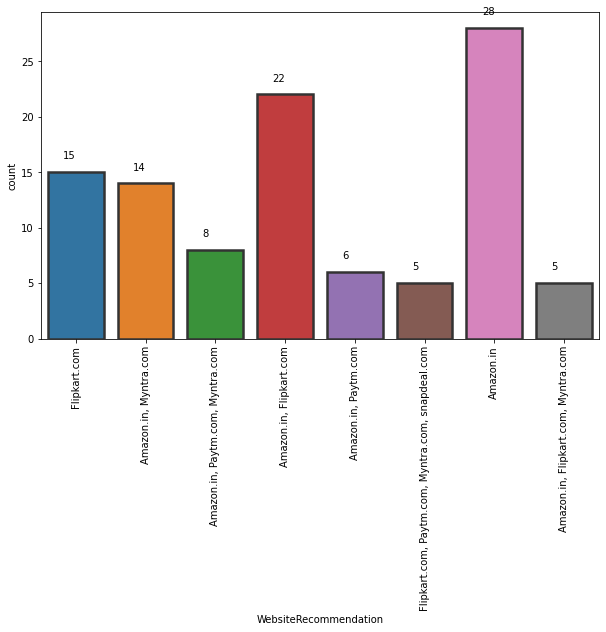

In [34]:
#Visualization of count plot
for i in data:
    plt.figure(figsize=(10,6))
    ax=sns.countplot(data[i],edgecolor=".2",linewidth=2.5)
    plt.xticks(rotation=90)
    for j in ax.patches:
        ax.annotate(int(j.get_height()),(j.get_x()+0.22,j.get_height()+1), va='bottom',color='black')
    plt.show() 

In [39]:
# Checking for statistical summary

data.describe(include='object')

gender          age   city       duration     shopng_last_1yr  \
count      103          103    103            103                 103   
unique       2            5     11              5                   6   
top     Female  21-30 years  Delhi  Above 4 years  Less than 10 times   
freq        66           32     22             39                  39   

          internet_mode      device device_screen_size              device_OS  \
count               103         103                103                    103   
unique                4           4                  4                      3   
top     Mobile internet  Smartphone             Others  Window/windows Mobile   
freq                 70          52                 51                     46   

              browser      channel_1        channel_2       explore_time  \
count             103            103              103                103   
unique              4              3                5                  5   
top     Google chrome  Search Engine  Via application  more than 15 mins   
freq               80             86               34                 48   

            payment_method abandon_freq            abandon_reason  \
count                  103          103                       103   
unique                   3            4                         5   
top     Credit/Debit cards    Sometimes  Better alternative offer   
freq                    59           64                        49   

       content_readability  product_comparison info_necessity info_details  \
count                  103                 103            103          103   
unique                   4                   4              5            4   
top     Strongly agree (5)  Strongly agree (5)      Agree (4)    Agree (4)   
freq                    60                  40             38           54   

        ease_of_navigation    processing_speed         UFI_website  \
count                  103                 103                 103   
unique                   4                   5                   5   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                    51                  45                  72   

       convinient_payment_methods               trust             empathy  \
count                         103                 103                 103   
unique                          3                   4                   4   
top            Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                           60                  52                  75   

          customer_privacy com_channel_availability discounts&monetarybenefit  \
count                  103                      103                       103   
unique                   3                        4                         5   
top     Strongly agree (5)       Strongly agree (5)        Strongly agree (5)   
freq                    69                       59                        41   

                 enjoyment convinient&flexible   return&replacemnt  \
count                  103                 103                 103   
unique                   5                   4                   3   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                    34                  56                  76   

           loyalty_program  DisplayQualityInfo    UserSatisfaction  \
count                  103                 103                 103   
unique                   5                   3                   3   
top     Strongly agree (5)  Strongly agree (5)  Strongly agree (5)   
freq                    44                  49                  66   

       NetBenefit_UserSatisfaction UserSatisfactionCannotExistWithoutTrust  \
count                          103                                     103   
unique                           4                                       5   
top             Strongly agree (5)     

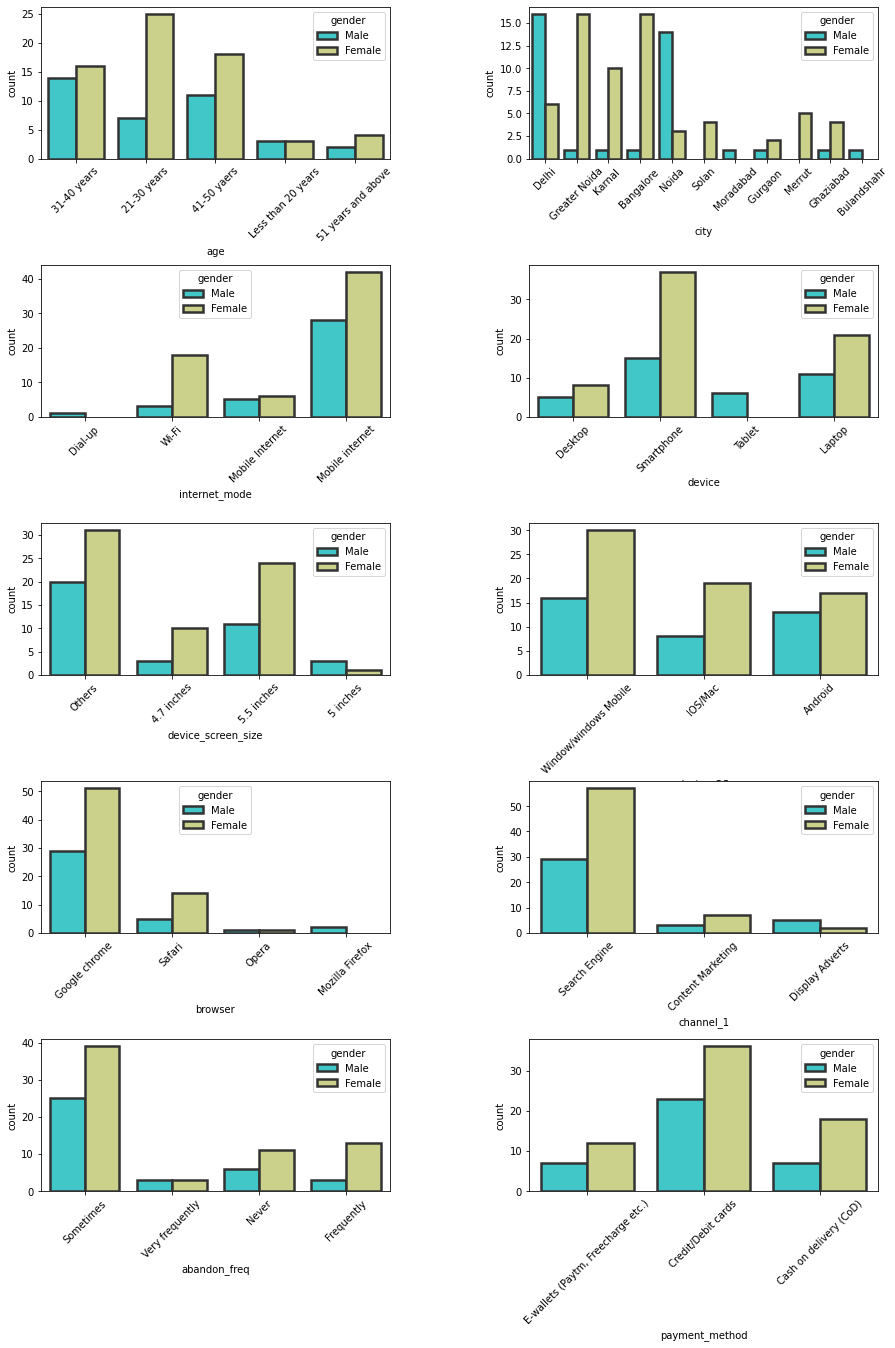

In [61]:
# Comparative analysis
plt.figure(figsize=(15,25))

#Comparative analysis of gender wrt age
plt.subplot(10,2,1)
plt.xticks(rotation=45)
sns.countplot(data['age'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt city
plt.subplot(10,2,2)
plt.xticks(rotation=45)
sns.countplot(data['city'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt internet_mode
plt.subplot(10,2,3)
plt.xticks(rotation=45)
sns.countplot(data['internet_mode'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt device
plt.subplot(10,2,4)
plt.xticks(rotation=45)
sns.countplot(data['device'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt device_screen_size
plt.subplot(10,2,5)
plt.xticks(rotation=45)
sns.countplot(data['device_screen_size'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt device_OS
plt.subplot(10,2,6)
plt.xticks(rotation=45)
sns.countplot(data['device_OS'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt browser
plt.subplot(10,2,7)
plt.xticks(rotation=45)
sns.countplot(data['browser'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt channel_1
plt.subplot(10,2,8)
plt.xticks(rotation=45)
sns.countplot(data['channel_1'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt abandon_freq
plt.subplot(10,2,9)
plt.xticks(rotation=45)
sns.countplot(data['abandon_freq'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

#Comparative analysis of gender wrt payment_method
plt.subplot(10,2,10)
plt.xticks(rotation=45)
sns.countplot(data['payment_method'], hue = data['gender'], data = data,edgecolor=".2",linewidth=2.5,palette='rainbow')

plt.subplots_adjust(wspace = 0.4, hspace = 0.7,top = 1.5)
plt.show()

In [63]:
# Creating a dataframe of the columns indicating the choice of online retailers based on various aspects.


choice= data[['OnlineRetailers', 'EasyToUseWebsite',
       'VisualAppealing', 'WildVarietyOfProductOnOffer', 'ProductInfo',
       'WebsiteSpeed', 'WebsiteReliability', 'websiteQuickness',
       'WebsitePaymentMethods', 'WebsiteDeliverySpeed',
       'WebsiteCustomerInfoPrivacy', 'WebsiteFinancialInfoSecurity',
       'PerceivedTrustworthiness', 'WebsiteOnlineAssistance',
       'WebsiteLongerLoginTime', 'WebsiteLongerDisplayTime',
       'websiteLatePriceDeclaration', 'WebsiteLongerPageLoading',
       'WebisteLimitedPaymentMode', 'WebsiteLongerDeliveryTime',
       'WebsiteDesignChange', 'WebsiteDisruption', 'WebsiteEfficientAsBefore',
       'WebsiteRecommendation']]

def making_count(col_name):
    dict_of_count = {'amazon': 0, 'flipkart':0, 'myntra': 0, 'paytm': 0, 'snapdeal': 0}
    for row in data[col_name].apply(lambda x: x.split(',')):
        for company in row:
            company = company.replace(".com", "").replace(".in", "").strip().lower()
            if col_name == 'WebsitePaymentMethods':
                company = company.replace('patym', 'paytm')
            dict_of_count[company] += 1
            
    return dict_of_count

In [64]:
# Checking the list of attributes where the respondants have present their choice.

list_of_dict = []
for col_name in choice.columns:
    print(col_name)
    list_of_dict.append(making_count(col_name))

OnlineRetailers
EasyToUseWebsite
VisualAppealing
WildVarietyOfProductOnOffer
ProductInfo
WebsiteSpeed
WebsiteReliability
websiteQuickness
WebsitePaymentMethods
WebsiteDeliverySpeed
WebsiteCustomerInfoPrivacy
WebsiteFinancialInfoSecurity
PerceivedTrustworthiness
WebsiteOnlineAssistance
WebsiteLongerLoginTime
WebsiteLongerDisplayTime
websiteLatePriceDeclaration
WebsiteLongerPageLoading
WebisteLimitedPaymentMode
WebsiteLongerDeliveryTime
WebsiteDesignChange
WebsiteDisruption
WebsiteEfficientAsBefore
WebsiteRecommendation


In [65]:
# Printing the list of dictionary with their respective counts of the attributes.

list_of_dict

[{'amazon': 103, 'flipkart': 86, 'myntra': 60, 'paytm': 63, 'snapdeal': 72},
 {'amazon': 96, 'flipkart': 80, 'myntra': 58, 'paytm': 53, 'snapdeal': 54},
 {'amazon': 85, 'flipkart': 69, 'myntra': 48, 'paytm': 29, 'snapdeal': 26},
 {'amazon': 82, 'flipkart': 72, 'myntra': 27, 'paytm': 8, 'snapdeal': 5},
 {'amazon': 91, 'flipkart': 78, 'myntra': 27, 'paytm': 27, 'snapdeal': 25},
 {'amazon': 96, 'flipkart': 61, 'myntra': 27, 'paytm': 40, 'snapdeal': 32},
 {'amazon': 88, 'flipkart': 56, 'myntra': 27, 'paytm': 43, 'snapdeal': 18},
 {'amazon': 83, 'flipkart': 62, 'myntra': 32, 'paytm': 48, 'snapdeal': 13},
 {'amazon': 83, 'flipkart': 79, 'myntra': 53, 'paytm': 35, 'snapdeal': 35},
 {'amazon': 94, 'flipkart': 60, 'myntra': 10, 'paytm': 0, 'snapdeal': 21},
 {'amazon': 85, 'flipkart': 57, 'myntra': 33, 'paytm': 32, 'snapdeal': 18},
 {'amazon': 77, 'flipkart': 59, 'myntra': 35, 'paytm': 37, 'snapdeal': 38},
 {'amazon': 88, 'flipkart': 56, 'myntra': 36, 'paytm': 11, 'snapdeal': 30},
 {'amazon': 88

In [66]:
# Converting the list of dictionary into dataframe.

data_retailers = pd.DataFrame.from_dict(list_of_dict)
# Adding a column named 'Name_of_column' to the dataframe.

data_retailers['Name_of_column'] = choice.columns

In [67]:
#dataframe
data_retailers

amazon  flipkart  myntra  paytm  snapdeal                Name_of_column
0      103        86      60     63        72               OnlineRetailers
1       96        80      58     53        54              EasyToUseWebsite
2       85        69      48     29        26               VisualAppealing
3       82        72      27      8         5   WildVarietyOfProductOnOffer
4       91        78      27     27        25                   ProductInfo
5       96        61      27     40        32                  WebsiteSpeed
6       88        56      27     43        18            WebsiteReliability
7       83        62      32     48        13              websiteQuickness
8       83        79      53     35        35         WebsitePaymentMethods
9       94        60      10      0        21          WebsiteDeliverySpeed
10      85        57      33     32        18    WebsiteCustomerInfoPrivacy
11      77        59      35     37        38  WebsiteFinancialInfoSecurity
12      88        56      36     11        30      PerceivedTrustworthiness
13      88        53      46     11        32       WebsiteOnlineAssistance
14      49        42      13     33        27        WebsiteLongerLoginTime
15      50        35      30     14        32      WebsiteLongerDisplayTime
16      19        16      30     32        16   websiteLatePriceDeclaration
17      25        24      24     40        23      WebsiteLongerPageLoading
18      41        24       2     22        40     WebisteLimitedPaymentMode
19      11        18       8     42        34     WebsiteLongerDeliveryTime
20      56        27      15     23         2           WebsiteDesignChange
21      30        26      26     14        28             WebsiteDisruption
22      68        43       5     26        10      WebsiteEfficientAsBefore
23      83        47      32     19         5         WebsiteRecommendation